In [1]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [64]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
# random number seed. This is so that you can run the same code again and again and get the same result.
numpy.random.seed(7)

In [18]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [66]:
# load pima indians dataset
# Pima Indians onset of diabetes dataset. 
# This is a standard machine learning dataset from the UCI Machine Learning repository. 
# It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

print(size(X))

# binary classification problem (onset of diabetes as 1 or not as 0). 
# All of the input variables that describe each patient are numerical. 
# This makes it easy to use directly with neural networks that expect numerical input and output values,
# and ideal for our first neural network in Keras.

print(X[1])

# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Pregnancy / Glucose level ... Body mass index  .. Age

print(Y[1])

6144
[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]
0.0


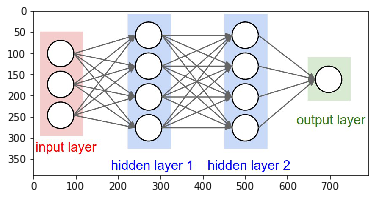

In [19]:
# create model
# Models in Keras are defined as a sequence of layers.

# Here fully-connected network structure with three layers
model = Sequential()
# ensure the input layer has the right number of inputs (8 in our case)
# Network topology - Euristic
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

img1 = mpimg.imread('neural_net2.jpeg')

imgplot = plt.imshow(img1)

In [22]:
# Compile model
# Compiling the model uses the efficient numerical libraries under the covers (the so-called backend)
# such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network 
# for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

# loss function to use to evaluate a set of weights
# optimizer used to search through different weights for the network 
# optional metrics we would like to collect and report during training.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Fit the model

# The training process will run for a fixed number of iterations through the dataset called epochs,
# that we must specify using the nepochs argument. 

# We can also set the number of instances that are evaluated before a weight update in the network is performed,
# called the batch size and set using the batch_size argument.

model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s 199us/step - loss: 0.5243 - acc: 0.7552
Epoch 2/150
768/768 [==============================] - 0s 195us/step - loss: 0.4996 - acc: 0.7643
Epoch 3/150
768/768 [==============================] - 0s 218us/step - loss: 0.5099 - acc: 0.7565
Epoch 4/150
768/768 [==============================] - 0s 193us/step - loss: 0.5058 - acc: 0.7539
Epoch 5/150
768/768 [==============================] - 0s 195us/step - loss: 0.4962 - acc: 0.7708
Epoch 6/150
768/768 [==============================] - 0s 215us/step - loss: 0.4973 - acc: 0.7565
Epoch 7/150
768/768 [==============================] - 0s 196us/step - loss: 0.5220 - acc: 0.7422
Epoch 8/150
768/768 [==============================] - 0s 193us/step - loss: 0.5030 - acc: 0.7539
Epoch 9/150
768/768 [==============================] - 0s 204us/step - loss: 0.5036 - acc: 0.7578
Epoch 10/150
768/768 [==============================] - 0s 201us/step - loss: 0.5043 - acc: 0.7591
Epoch 11/150
768/76

768/768 [==============================] - 0s 167us/step - loss: 0.4908 - acc: 0.7578
Epoch 84/150
768/768 [==============================] - 0s 162us/step - loss: 0.4805 - acc: 0.7578
Epoch 85/150
768/768 [==============================] - 0s 157us/step - loss: 0.4909 - acc: 0.7461
Epoch 86/150
768/768 [==============================] - 0s 166us/step - loss: 0.4851 - acc: 0.7760
Epoch 87/150
768/768 [==============================] - 0s 167us/step - loss: 0.4830 - acc: 0.7747
Epoch 88/150
768/768 [==============================] - 0s 172us/step - loss: 0.4836 - acc: 0.7552
Epoch 89/150
768/768 [==============================] - 0s 164us/step - loss: 0.4841 - acc: 0.7591
Epoch 90/150
768/768 [==============================] - 0s 165us/step - loss: 0.4802 - acc: 0.7695
Epoch 91/150
768/768 [==============================] - 0s 155us/step - loss: 0.4762 - acc: 0.7708
Epoch 92/150
768/768 [==============================] - 0s 160us/step - loss: 0.4835 - acc: 0.7565
Epoch 93/150
768/768 [=

In [59]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 22us/step

acc: 78.12%


In [73]:
Xtest = X

Xtest[0, 0] = 1
Xtest[0, 1] = 100
Xtest[0, 5] = 33
print(Xtest[0])

[  1.    100.     72.     35.      0.     33.      0.627 100.   ]


In [79]:
# calculate predictions
predictions = model.predict(X)
# round predictions
# rounded = [round(x[0]) for x in predictions]
rounded = [x[0] for x in predictions]
print(rounded[0:9])

print(Y[0:9])

[0.0060089817, 0.18015197, 0.83742964, 0.10538861, 0.8763438, 0.3511638, 0.22985561, 0.61323357, 0.95313764]
[1. 0. 1. 0. 1. 0. 1. 0. 1.]
